In [29]:
import networkx as nx
from sympy import *
from bond_graph import *
import time
%reload_ext autoreload
%autoreload 2



Node Labels: 
{0: 'Se_0', 1: '1_1', 2: 'C_2', 3: 'I_3', 4: '0_4', 5: 'C_5', 6: 'I_6'}

Standard Node Order: 
dict_values(['Se_0', '1_1', 'C_2', 'I_3', '0_4', 'C_5', 'I_6'])

Port Addition Mask: 
[0 0 1 1 1 1 1 1 1]

 Causal Adjacency Mask: 
[[0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
16.3265306122449% of causal bond actions remain after filtering

 Power Flow Adjacency Mask: 
[[0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
36.734693877551024% of power flow bond addition actions remain after filtering

Unmasked Number of Bond Addition Actions:  2401
Masked Number of Bond Addition Actions:  144
Percentage of Original Action Space: 5.99750104123282%


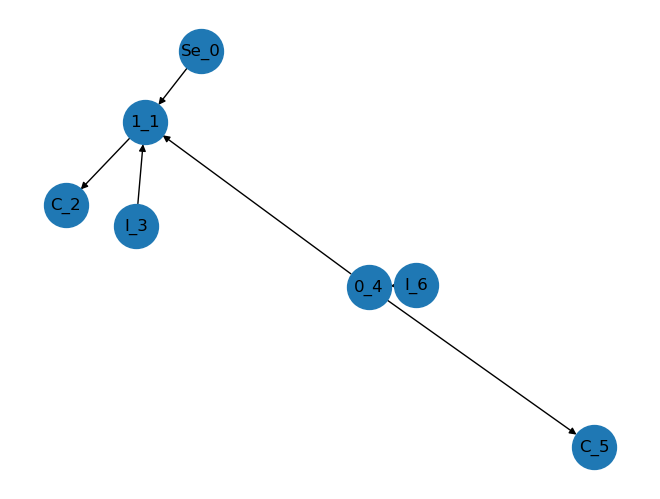

In [1]:
G = BondGraph(max_nodes=20, num_states=4)
G.add_element(EffortSource(np.array([1, 2, 3])))
G.add_element(OneJunction())
G.add_bond(0, 1, 1)
G.add_element(Capacitance(capacitance=10))
G.add_bond(1, 2, 1)
G.add_element(Inertance(inertance=10))
G.add_bond(3, 1, -1)
G.add_element(ZeroJunction())
G.add_bond(4, 1, -1)
G.add_element(Capacitance(capacitance=10))
G.add_element(Inertance(inertance=10))
G.add_bond(4, 5, 1)
G.add_bond(6, 4, -1)
# G.add_element(Capacitance(capacitance=10))

# print(list(G.graph.nodes(data=True)))
# print(G.graph.nodes['1_1']['node'].element_type)


labels = nx.get_node_attributes(G.graph, 'element_label')

nx.draw(G.graph, labels=labels, with_labels=True, node_size=1000)

## Time to access energy storage elements (custom class vs. networkx)
# start = time.time()
# energy_storage_elements = G.get_energy_storage_elements()
# end = time.time()

# print(energy_storage_elements)
# print("Custom BG Class Elapsed Time: ", end - start)


# start = time.time()
# energy_storage_elements = [x for x,y in G.graph.nodes(data=True) if y['port_type'] == BondGraphPortTypes.CAPACITANCE or y['port_type'] == BondGraphPortTypes.INERTANCE]
# end = time.time()

# print("Networkx Elapsed Time: ", end - start)
# print(energy_storage_elements)

# print(G.graph.nodes)
# print(nx.to_numpy_array(G.graph))
# print(G.get_port_addition_mask())

print("\nNode Labels: ")
print(labels)


print("\nStandard Node Order: ")
# print(G.graph.nodes)
print(labels.values())

print("\nPort Addition Mask: ")
print(G.get_element_addition_mask())

causal_adjacency_mask, power_flow_adjacency_mask = G.get_bond_addition_mask()
print("\n Causal Adjacency Mask: ")
print(causal_adjacency_mask)
percent_fill=np.count_nonzero(causal_adjacency_mask)/np.size(causal_adjacency_mask)
print(f"{percent_fill*100}% of causal bond actions remain after filtering")

print("\n Power Flow Adjacency Mask: ")
print(power_flow_adjacency_mask)
percent_fill=np.count_nonzero(power_flow_adjacency_mask)/np.size(power_flow_adjacency_mask)
print(f"{percent_fill*100}% of power flow bond addition actions remain after filtering")

print("\nUnmasked Number of Bond Addition Actions: ", np.size(causal_adjacency_mask)*np.size(power_flow_adjacency_mask))
print("Masked Number of Bond Addition Actions: ", np.count_nonzero(causal_adjacency_mask) * np.count_nonzero(power_flow_adjacency_mask))
print(f"Percentage of Original Action Space: {(np.count_nonzero(causal_adjacency_mask) * np.count_nonzero(power_flow_adjacency_mask))/(np.size(causal_adjacency_mask)*np.size(power_flow_adjacency_mask))*100}%")


In [ ]:
from sympy import *

params = {"x":1, "y":2}
vars = symbols(list(params.keys()))

print(y)
# for key, value in enumerate(params):
#     vars[key] = params[key]


In [15]:

import itertools
from itertools import permutations 

max_nodes = 3
possible_edge_list = permutations(range(max_nodes), 2)

print(list(possible_edge_list))

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]


In [11]:
import networkx as nx
G = nx.DiGraph()
G.add_node(1, x={'a':1, 'b':2})
G.add_node(2)
G.add_node(3, bond_type='causal')

print(G.nodes)

# print(list(G.nodes.data()))
# for node_data in G.nodes.data():
#     print(node_data)

[1, 2, 3]


In [183]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
num_node_types = 3
max_nodes = 3
""
add_edge_or_node = spaces.Discrete(2)
node_type_space = spaces.Discrete(num_node_types)
mask = (np.array([1, 0, 0], dtype=np.int8), np.array([1, 1, 1] , dtype=np.int8), np.array([1, 1], dtype=np.int8))
print(mask)
edge_type_space = spaces.MultiDiscrete([max_nodes, max_nodes, 2]) 

edge_type_space.sample(mask=mask)

# action_space = spaces.tuple(node_type_space, edge_type_space)
# action_space.sample(num_nodes=1, num_edges=1)

        

(array([1, 0, 0], dtype=int8), array([1, 1, 1], dtype=int8), array([1, 1], dtype=int8))


array([0, 2, 0])

None
{}


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


[Eq(Se_0, e_1:0), Eq(-e_3:1, e_1:0 - e_1:2 - e_1:4), Eq(f_3:1, f_1:0), Eq(f_3:1, f_1:2), Eq(f_3:1, f_1:4), Eq(e_1:2, q_2/10), Eq(q_dot_2, f_1:2), Eq(f_3:1, p_3/10), Eq(q_dot_3, e_3:1), Eq(e_1:4, 2*f_1:4)]
[Eq(Se_0, e_1:0), Eq(-e_3:1, e_1:0 - e_1:2 - e_1:4), Eq(f_3:1, f_1:0), Eq(f_3:1, f_1:2), Eq(f_3:1, f_1:4), Eq(e_1:2, q_2/10), Eq(q_dot_2, f_1:2), Eq(f_3:1, p_3/10), Eq(q_dot_3, e_3:1), Eq(e_1:4, 2*f_1:4)]


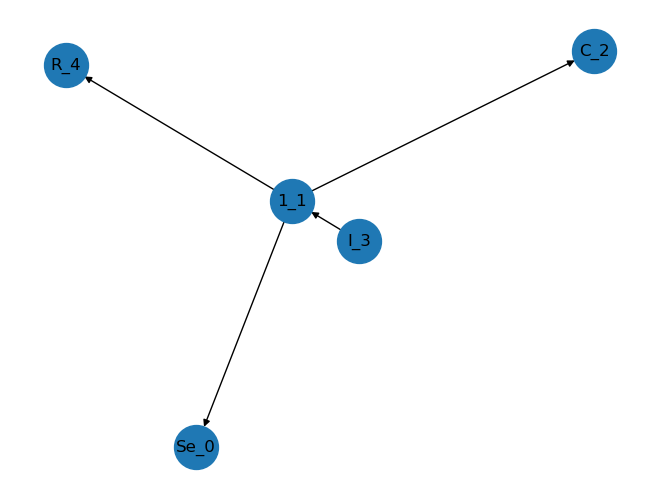

In [162]:
# Initialize bond graph
G = BondGraph(max_nodes=20, num_states=4)
G.add_element(EffortSource(np.array([1, 2, 3])))
G.add_element(OneJunction())
G.add_bond(1, 0, -1)
G.add_element(Capacitance(capacitance=10))
G.add_bond(1, 2, 1)
G.add_element(Inertance(inertance=10))
G.add_bond(3, 1, -1)
G.add_element(Resistance(resistance=2))
G.add_bond(1, 4, 1)

# Draw the bond graph with labels
labels = nx.get_node_attributes(G.flow_causal_graph, 'element_label')
nx.draw(G.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

expr = []
for node in G.flow_causal_graph.nodes:
    expr += G.derive_constitutive_laws(node)
    
print(expr)

Se_0 = 1
print(expr)

In [128]:
u = 2
v = 4
e = Symbol(f"e_{u}:{v}")
v = Symbol('v')

Eq(e, sum((v, 0, 5)))


Eq(e_2:4, v + 5)